# Support Vector Machines
## SVM - Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="Types_of_concrete_slump.jpg">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('..\data\cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
df.shape

(103, 10)

In [6]:
# percent null value
round(100 * df.isnull().sum()/len(df), 2)

Cement                                0.0
Slag                                  0.0
Fly ash                               0.0
Water                                 0.0
SP                                    0.0
Coarse Aggr.                          0.0
Fine Aggr.                            0.0
SLUMP(cm)                             0.0
FLOW(cm)                              0.0
Compressive Strength (28-day)(Mpa)    0.0
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [9]:
# check duplicated
df.duplicated(subset=None).sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00
Compressive Strength (28-day)(Mpa),103.0,36.038738,7.837120,17.19,30.90,35.52,41.205,58.53


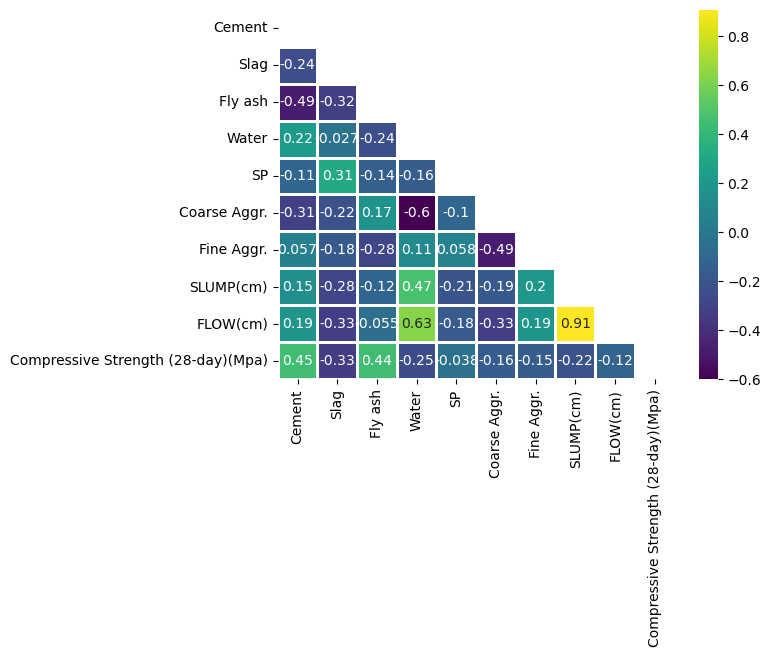

In [13]:
# matrix 
matrix = df.corr()

# mask
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)]= True

# heatmap
sns.heatmap(matrix, mask= mask, annot=True, lw =1, cmap= 'viridis');

In [20]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

## Create X and y

In [14]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

## Train | Test Split

Alternatively you could also set this up as a pipline, something like:

    >>> from sklearn.pipeline import make_pipeline
    >>> from sklearn.preprocessing import StandardScaler
    >>> from sklearn.svm import SVR

    >>> clf = make_pipeline(StandardScaler(), SVR())

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Support Vector Machines - Regression

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.

In [26]:
from sklearn.svm import LinearSVR, SVR

Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

In [27]:
base_model = SVR()

In [28]:
base_model.fit(X_train_scaler, y_train)

SVR()

In [29]:
base_preds = base_model.predict(X_test_scaler)

## Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
MAE = mean_absolute_error(y_test, base_preds)
MSE = mean_squared_error(y_test, base_preds)
RMSE = np.sqrt(MSE)

In [39]:
MAE

5.236902091259178

In [40]:
MSE

44.83527552212948

In [41]:
RMSE

6.695914838327133

In [42]:
y_test.mean()

36.26870967741935

## Hyperparameter Tuning GridSearchCV

In [44]:
param_grid = {'C' : [0.01, 0.1, 0.5,1], 
              'kernel' : ['linear', 'rbf', 'poly'], 
              'gamma' : ['scale', 'poly'],
              'epsilon' : [0.01, 0.1, 0.5, 1,2]              
             }

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
svr = SVR()

In [47]:
grid = GridSearchCV(svr, param_grid)

In [48]:
grid.fit(X_train_scaler, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'epsilon': [0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'poly'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [49]:
grid.best_estimator_.get_params()

{'C': 1,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 2,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [51]:
grid.best_params_

{'C': 1, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [52]:
grid_preds = grid.predict(X_test_scaler)

In [53]:
# metrix
mean_absolute_error(y_test, grid_preds)

2.5128012210762365

In [54]:
np.sqrt(mean_squared_error(y_test, grid_preds))

3.178210305119858